In [ ]:
!pip install sentence_transformers
!pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.8/132.8 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 30.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 14.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 8.3 MB/s eta 0:00:00
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039281 sha256=81c4dd4971cd281a055a4dd02a84c8ae2452b87967f3b8678a3ab1a329c3c90b
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
  Created wheel for umap-l

In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Reviews.csv' #https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews
df = pd.read_csv(file_path)
df.head(5)

Mounted at /content/drive


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
df.shape

(568454, 10)

In [ ]:
df = df.drop_duplicates(subset='Text')

In [ ]:
df.shape

(393579, 10)

In [ ]:
df_final=df.head(5000)

In [ ]:
from sentence_transformers import SentenceTransformer
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
df_final['embeddings'] = df_final['Text'].apply(lambda x: embedding_model.encode(x))

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

<ipython-input-7-b3b6a0dbe186>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['embeddings'] = df_final['Text'].apply(lambda x: embedding_model.encode(x))


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


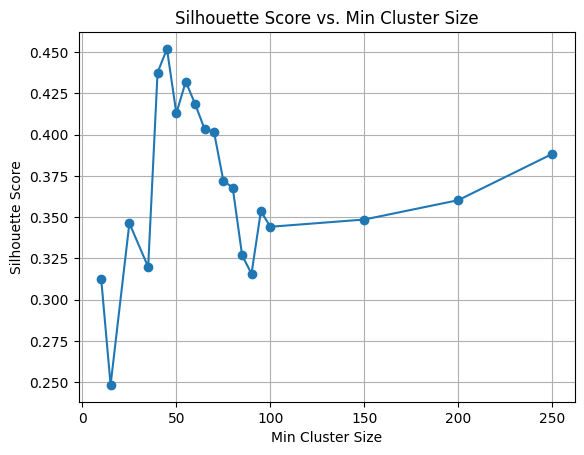

In [ ]:
import numpy as np
import umap
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
import hdbscan
import matplotlib.pyplot as plt




umap_model = umap.UMAP(n_neighbors=20, min_dist=0, random_state=42)
umap_embeddings = umap_model.fit_transform(list(df_final['embeddings']))


def calculate_silhouette_score(min_cluster_size):
    clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size,metric='euclidean', cluster_selection_method='eom', prediction_data=True)
    labels = clusterer.fit_predict(umap_embeddings)

    silhouette = silhouette_score(umap_embeddings, labels, metric='euclidean')
    return silhouette


min_cluster_size_values = [10,15,25,35,40,45,50,55,60,65,70,75,80,85,90,95,100,150,200,250]
silhouette_scores = [calculate_silhouette_score(min_cluster_size) for min_cluster_size in min_cluster_size_values]

plt.plot(min_cluster_size_values, silhouette_scores, marker='o')
plt.xlabel('Min Cluster Size')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Min Cluster Size')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


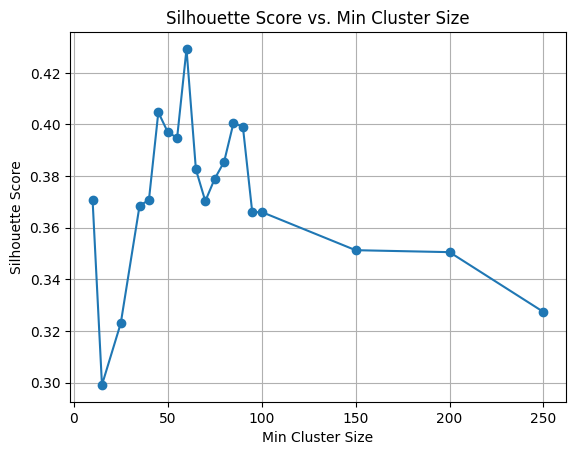

In [ ]:
import numpy as np
import umap
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
import hdbscan
import matplotlib.pyplot as plt



# Calculate UMAP embeddings once with fixed parameters
umap_model = umap.UMAP(n_neighbors=10, min_dist=0, random_state=42)
umap_embeddings = umap_model.fit_transform(list(df_final['embeddings']))

# Define a function to calculate silhouette score for a given min_cluster_size value
def calculate_silhouette_score(min_cluster_size):
    # Perform clustering using HDBSCAN with the specified min_cluster_size
    clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size,metric='euclidean', cluster_selection_method='eom', prediction_data=True)
    labels = clusterer.fit_predict(umap_embeddings)

    silhouette = silhouette_score(umap_embeddings, labels, metric='euclidean')
    return silhouette

# Try different min_cluster_size values and calculate silhouette scores
min_cluster_size_values = [10,15,25,35,40,45,50,55,60,65,70,75,80,85,90,95,100,150,200,250]
silhouette_scores = [calculate_silhouette_score(min_cluster_size) for min_cluster_size in min_cluster_size_values]

# Plot the silhouette scores against different min_cluster_size values
plt.plot(min_cluster_size_values, silhouette_scores, marker='o')
plt.xlabel('Min Cluster Size')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Min Cluster Size')
plt.grid(True)
plt.show()

In [ ]:
from bertopic import BERTopic
from hdbscan import HDBSCAN
from sentence_transformers import SentenceTransformer
from umap import UMAP
sentence_model = SentenceTransformer("all-MiniLM-L6-v2")
umap_model = UMAP(n_neighbors=20)
hdbscan_model = HDBSCAN(min_cluster_size=45)
model = BERTopic(verbose=True,embedding_model=sentence_model,umap_model=umap_model,hdbscan_model=hdbscan_model)
topics, probs = model.fit_transform(df_final['Text'])


2024-02-22 16:29:24,735 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/157 [00:00<?, ?it/s]

2024-02-22 16:32:54,894 - BERTopic - Embedding - Completed ✓
2024-02-22 16:32:54,896 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-02-22 16:33:00,502 - BERTopic - Dimensionality - Completed ✓
2024-02-22 16:33:00,504 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-02-22 16:33:00,591 - BERTopic - Cluster - Completed ✓
2024-02-22 16:33:00,605 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-02-22 16:33:00,997 - BERTopic - Representation - Completed ✓


In [ ]:

from sklearn.feature_extraction.text import CountVectorizer
vectorizer_model = CountVectorizer(ngram_range=(1,2),stop_words="english")
model.update_topics(df_final['Text'], vectorizer_model=vectorizer_model) #finetune


In [ ]:
freq = model.get_topic_info()
print("Number of topics: {}".format( len(freq)))
freq

Number of topics: 19


,Topic,Count,Name,Representation,Representative_Docs
0,-1,1352,-1_br_br br_like_coffee,"[br, br br, like, coffee, good, product, flavo...","[I purchased this product because of its name,..."
1,0,467,0_mix_gluten_pancakes_gluten free,"[mix, gluten, pancakes, gluten free, free, bis...",[My husband is gluten intolerant and as with a...
2,1,453,1_product_candy_great_good,"[product, candy, great, good, price, br, just,...","[Being the candy-lover that I am, I wanted to ..."
3,2,416,2_food_dog_dogs_dog food,"[food, dog, dogs, dog food, br, newman, br br,...",[This is the best dog food I have ever purchas...
4,3,401,3_chips_potato_kettle_br,"[chips, potato, kettle, br, bag, chip, flavor,...",[I once loved these chips and they were the on...
5,4,301,4_tea_green_green tea_br,"[tea, green, green tea, br, teas, drink, water...",[If you love green tea then you will be impres...
6,5,292,5_chocolate_hot_cocoa_hot chocolate,"[chocolate, hot, cocoa, hot chocolate, cup, ho...",[Grove square Hot Cocoa is just the right amou...
7,6,173,6_coffee_like_bitter_cup,"[coffee, like, bitter, cup, roast, blend, br, ...",[Some reviewers say the coffee is bitter- I li...
8,7,168,7_sauce_hot_spicy_chicken,"[sauce, hot, spicy, chicken, use, br, love, sw...",[My husband and I are both kind of wimpy when ...
9,8,144,8_sugar_stevia_use_br,"[sugar, stevia, use, br, product, sweet, like,...",[I am hooked on Stevia. Not only is it all nat...


In [ ]:
model.get_topic(0)

[('mix', 0.04240469232943169),
 ('gluten', 0.03443641219326978),
 ('pancakes', 0.03220368210428641),
 ('gluten free', 0.029069035867766855),
 ('free', 0.027742987415836976),
 ('bisquick', 0.02395064285959528),
 ('make', 0.01854721684567601),
 ('br', 0.01850464550430098),
 ('waffles', 0.017916398693463644),
 ('pancake', 0.017801387244426252)]

In [ ]:
model.visualize_hierarchy()

In [ ]:
table=model.get_document_info(df_final.Text)
table.head(5)

,Document,Topic,Name,Representation,Representative_Docs,Top_n_words,Probability,Representative_document
0,I have bought several of the Vitality canned d...,2,2_food_dog_dogs_dog food,"[food, dog, dogs, dog food, br, newman, br br,...",[This is the best dog food I have ever purchas...,food - dog - dogs - dog food - br - newman - b...,1.000000,False
1,Product arrived labeled as Jumbo Salted Peanut...,-1,-1_br_br br_like_coffee,"[br, br br, like, coffee, good, product, flavo...","[I purchased this product because of its name,...",br - br br - like - coffee - good - product - ...,0.000000,False
2,This is a confection that has been around a fe...,-1,-1_br_br br_like_coffee,"[br, br br, like, coffee, good, product, flavo...","[I purchased this product because of its name,...",br - br br - like - coffee - good - product - ...,0.000000,False
3,If you are looking for the secret ingredient i...,8,8_sugar_stevia_use_br,"[sugar, stevia, use, br, product, sweet, like,...",[I am hooked on Stevia. Not only is it all nat...,sugar - stevia - use - br - product - sweet - ...,0.902226,False
4,Great taffy at a great price. There was a wid...,1,1_product_candy_great_good,"[product, candy, great, good, price, br, just,...","[Being the candy-lover that I am, I wanted to ...",product - candy - great - good - price - br - ...,0.615531,False


In [ ]:
table.to_excel("output_file.xlsx", index=False)

In [ ]:
similar_topics, similarity = model.find_topics("candy", top_n = 3)
print(similar_topics)

[8, 10, 9]


In [ ]:
similarity

[0.6544143244304248, 0.5971229846179393, 0.5874025988628993]

In [ ]:
model.visualize_barchart(top_n_topics=10)